<a href="https://colab.research.google.com/github/HennySweet/Henny/blob/main/Pengolahan_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
dataset = pd.read_excel ('/content/kasus.xls')
print(dataset)

      pclass  survived                                             name  \
0          1         1                    Allen, Miss. Elisabeth Walton   
1          1         1                   Allison, Master. Hudson Trevor   
2          1         0                     Allison, Miss. Helen Loraine   
3          1         0             Allison, Mr. Hudson Joshua Creighton   
4          1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1304       3         0                             Zabour, Miss. Hileni   
1305       3         0                            Zabour, Miss. Thamine   
1306       3         0                        Zakarian, Mr. Mapriededer   
1307       3         0                              Zakarian, Mr. Ortin   
1308       3         0                               Zimmerman, Mr. Leo   

         sex      age  sibsp  parch  ticket      fare    cabin embarked boat  \
0     female  29.00

In [ ]:
print(dataset.isnull().sum())


pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        0
boat          823
body         1188
home.dest     564
dtype: int64


In [ ]:
dataset['age'] = dataset['age'].fillna(dataset['age'].median())


In [ ]:
print(dataset['age'].unique())


[29.      0.9167  2.     30.     25.     48.     63.     39.     53.
 71.     47.     18.     24.     26.     80.     28.     50.     32.
 36.     37.     42.     19.     35.     45.     40.     58.     22.
 41.     44.     59.     60.     33.     17.     11.     14.     49.
 76.     46.     27.     64.     55.     70.     38.     51.     31.
  4.     54.     23.     43.     52.     16.     32.5    21.     15.
 65.     28.5    45.5    56.     13.     61.     34.      6.     57.
 62.     67.      1.     12.     20.      0.8333  8.      0.6667  7.
  3.     36.5    18.5     5.     66.      9.      0.75   70.5    22.5
  0.3333  0.1667 40.5    10.     23.5    34.5    20.5    30.5    55.5
 38.5    14.5    24.5    60.5    74.      0.4167 11.5    26.5   ]


In [ ]:
# Memeriksa nilai umur yang mencurigakan (misalnya lebih kecil dari 1 tahun atau lebih besar dari 100 tahun)
dataset[dataset['age'] < 1]
dataset[dataset['age'] > 100]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


In [ ]:
# Ingin mengganti nilai yang kurang dari 1 (seperti 0.9167) dengan median umur
dataset['age'] = dataset['age'].apply(lambda x: dataset['age'].median() if x < 1 else x)

In [ ]:
print(dataset['age'].unique())


[29.  28.   2.  30.  25.  48.  63.  39.  53.  71.  47.  18.  24.  26.
 80.  50.  32.  36.  37.  42.  19.  35.  45.  40.  58.  22.  41.  44.
 59.  60.  33.  17.  11.  14.  49.  76.  46.  27.  64.  55.  70.  38.
 51.  31.   4.  54.  23.  43.  52.  16.  32.5 21.  15.  65.  28.5 45.5
 56.  13.  61.  34.   6.  57.  62.  67.   1.  12.  20.   8.   7.   3.
 36.5 18.5  5.  66.   9.  70.5 22.5 40.5 10.  23.5 34.5 20.5 30.5 55.5
 38.5 14.5 24.5 60.5 74.  11.5 26.5]


In [ ]:
dataset['age'] = dataset['age'].round()  # Pembulatan ke angka bulat terdekat


In [ ]:
print(dataset.isnull().sum())


pclass        0
survived      0
name          0
age           0
sibsp         0
parch         0
ticket        0
fare          0
cabin         0
boat          0
body          0
home.dest     0
sex_male      0
embarked_Q    0
embarked_S    0
dtype: int64


In [ ]:
dataset.to_excel('new_dataset1.xlsx', index=False)


In [ ]:
# Mengisi nilai kosong di kolom numerik dengan mean
dataset['fare'] = dataset['fare'].fillna(dataset['fare'].mean())



# Jika ada kolom lainnya yang kosong dan perlu diisi, Anda dapat menambahkannya dengan cara yang sama
# Misalnya, mengisi kolom 'boat' dan 'body' dengan modus atau mean sesuai tipe datanya
dataset['boat'] = dataset['boat'].fillna(dataset['boat'].mode()[0])  # Kolom kategori
dataset['body'] = dataset['body'].fillna(dataset['body'].mode()[0])  # Kolom kategori
dataset['cabin'] = dataset['cabin'].fillna(dataset['cabin'].mode()[0])  # Menggunakan modus
dataset['home.dest'] = dataset['home.dest'].fillna(dataset['home.dest'].mode()[0])



#Sekalian cek data balik
print(dataset.isnull().sum())


pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
body         0
home.dest    0
dtype: int64


In [ ]:
print(dataset.describe())  # Statistik deskriptif untuk kolom numerik



            pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1309.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.744843     0.498854     0.385027   
std       0.837836     0.486055    12.604389     1.041658     0.865560   
min       1.000000     0.000000     1.000000     0.000000     0.000000   
25%       2.000000     0.000000    23.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    35.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare         body  
count  1309.000000  1309.000000  
mean     33.295479    15.772345  
std      51.738879    54.953095  
min       0.000000     1.000000  
25%       7.895800     1.000000  
50%      14.454200     1.000000  
75%      31.275000     1.000000  
max     512.329200   328.000000  


In [ ]:
dataset.to_excel('new_dataset.xlsx', index=False)


In [ ]:
# Import library yang diperlukan
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Misalkan ini dataset awal
dataset = pd.read_excel('/content/kasus.xls')

# Identifikasi kolom numerik
numerical_features = ['age', 'fare', 'sibsp', 'parch']  # Sesuaikan dengan kolom numerik kamu

# Buat salinan dataset untuk normalisasi
dataset_normalized = dataset.copy()

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Transformasi kolom numerik
dataset_normalized[numerical_features] = scaler.fit_transform(dataset[numerical_features])

# Cek hasil normalisasi
print(dataset_normalized.head())


   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

        age  sibsp     parch  ticket      fare    cabin embarked boat   body  \
0  0.361169  0.000  0.000000   24160  0.412503       B5        S    2    NaN   
1  0.009395  0.125  0.222222  113781  0.295806  C22 C26        S   11    NaN   
2  0.022964  0.125  0.222222  113781  0.295806  C22 C26        S  NaN    NaN   
3  0.373695  0.125  0.222222  113781  0.295806  C22 C26        S  NaN  135.0   
4  0.311064  0.125  0.222222  113781  0.295806  C22 C26        S  NaN    NaN   

                         home.dest  
0

In [ ]:
dataset.to_excel('new_dataset2.xlsx', index=False)


In [ ]:
# Cek statistik deskriptif kolom numerik setelah normalisasi
print(dataset_normalized[numerical_features].describe())


               age         fare        sibsp        parch
count  1046.000000  1308.000000  1309.000000  1309.000000
mean      0.372206     0.064988     0.062357     0.042781
std       0.180545     0.101026     0.130207     0.096173
min       0.000000     0.000000     0.000000     0.000000
25%       0.260960     0.015412     0.000000     0.000000
50%       0.348643     0.028213     0.000000     0.000000
75%       0.486430     0.061045     0.125000     0.000000
max       1.000000     1.000000     1.000000     1.000000


In [ ]:
print("Dataset Setelah Normalisasi dan Transformasi:")
print(dataset_normalized.head())

Dataset Setelah Normalisasi dan Transformasi:
   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

        age  sibsp     parch  ticket      fare    cabin embarked boat   body  \
0  0.361169  0.000  0.000000   24160  0.412503       B5        S    2    NaN   
1  0.009395  0.125  0.222222  113781  0.295806  C22 C26        S   11    NaN   
2  0.022964  0.125  0.222222  113781  0.295806  C22 C26        S  NaN    NaN   
3  0.373695  0.125  0.222222  113781  0.295806  C22 C26        S  NaN  135.0   
4  0.311064  0.125  0.222222  113781  0.295806  C22 C26        S  NaN    

In [ ]:
print("\nStatistik Deskriptif Dataset:")
print(dataset_normalized.describe())


Statistik Deskriptif Dataset:
            pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971     0.372206     0.062357     0.042781   
std       0.837836     0.486055     0.180545     0.130207     0.096173   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000     0.000000     0.260960     0.000000     0.000000   
50%       3.000000     0.000000     0.348643     0.000000     0.000000   
75%       3.000000     1.000000     0.486430     0.125000     0.000000   
max       3.000000     1.000000     1.000000     1.000000     1.000000   

              fare        body  
count  1308.000000  121.000000  
mean      0.064988  160.809917  
std       0.101026   97.696922  
min       0.000000    1.000000  
25%       0.015412   72.000000  
50%       0.028213  155.000000  
75%       0.061045  256.000000  
max       1.000000  328.000000  


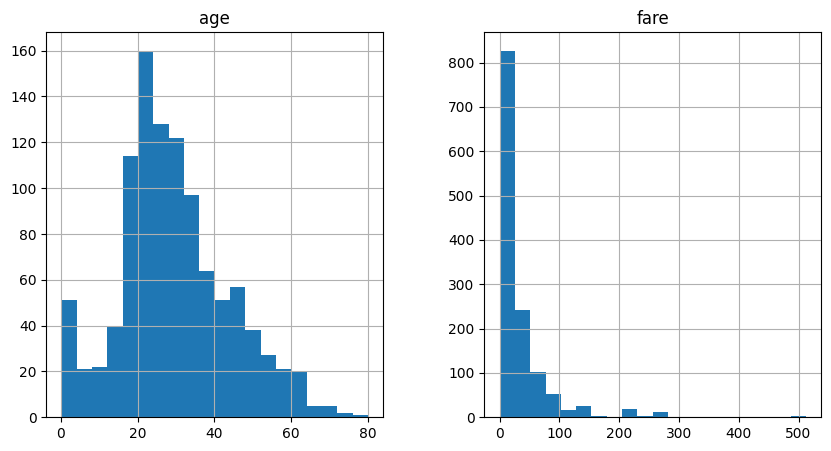

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Histogram Age dan Fare
dataset[['age', 'fare']].hist(figsize=(10, 5), bins=20)
plt.show()

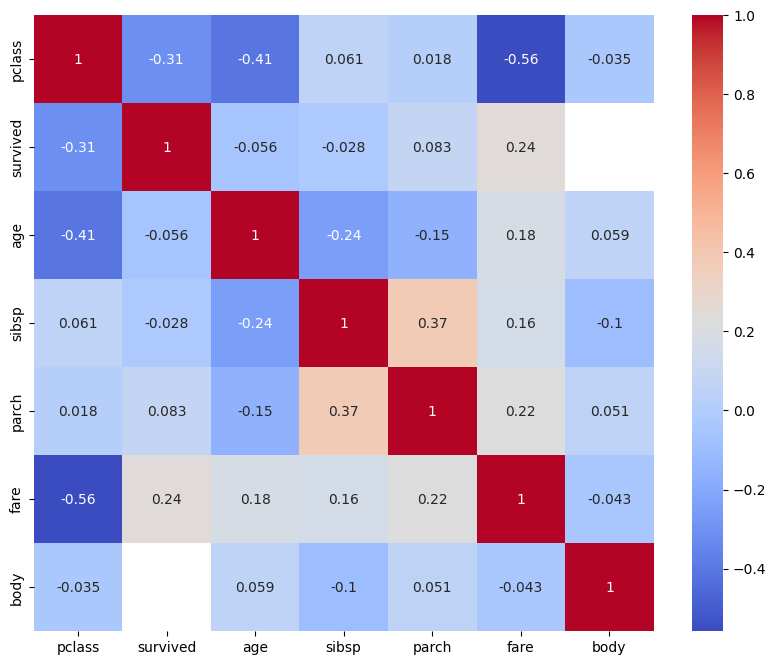

In [ ]:
# Pilih kolom numerik saja
dataset_numerik = dataset.select_dtypes(include=['float64', 'int64'])
# Heatmap korelasi untuk kolom numerik
plt.figure(figsize=(10, 8))
sns.heatmap(dataset_numerik.corr(), annot=True, cmap='coolwarm')
plt.show()


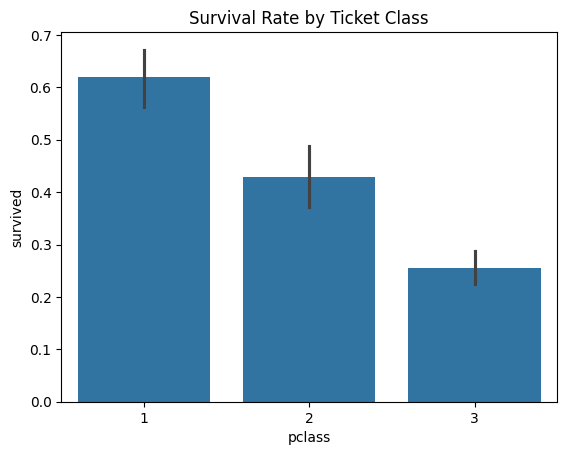

In [ ]:
sns.barplot(x='pclass', y='survived', data=dataset)
plt.title('Survival Rate by Ticket Class')
plt.show()


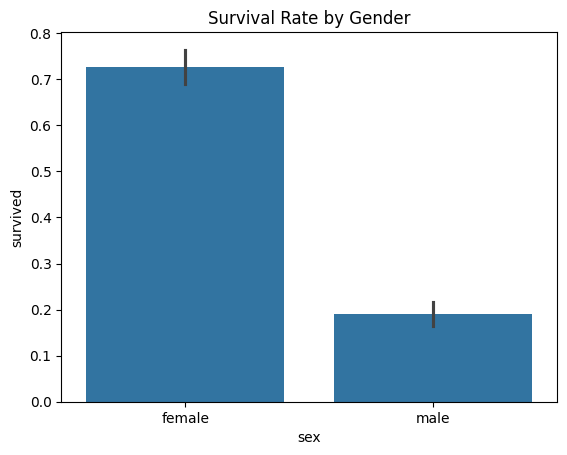

In [ ]:
sns.barplot(x='sex', y='survived', data=dataset)
plt.title('Survival Rate by Gender')
plt.show()


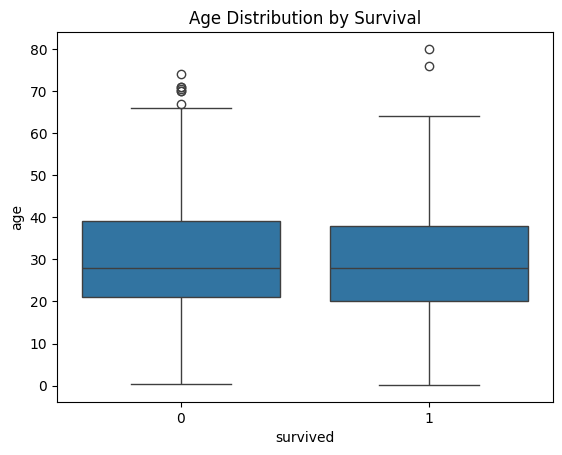

In [ ]:
sns.boxplot(x='survived', y='age', data=dataset)
plt.title('Age Distribution by Survival')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X = dataset[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
y = dataset['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test:", y_test.shape)


Ukuran X_train: (1047, 7)
Ukuran X_test: (262, 7)
Ukuran y_train: (1047,)
Ukuran y_test: (262,)


In [ ]:
print("Distribusi y_train:")
print(y_train.value_counts())

print("Distribusi y_test:")
print(y_test.value_counts())


Distribusi y_train:
survived
0    665
1    382
Name: count, dtype: int64
Distribusi y_test:
survived
0    144
1    118
Name: count, dtype: int64


In [ ]:
print("Contoh data X_train:")
print(X_train.head())
print("Contoh data y_train:")
print(y_train.head())

print("Contoh data X_test:")
print(X_test.head())
print("Contoh data y_test:")
print(y_test.head())


Contoh data X_train:
     pclass     sex   age  sibsp  parch      fare embarked
772       3    male  17.0      0      0    7.8958        S
543       2    male  36.0      0      0   10.5000        S
289       1  female  18.0      0      2   79.6500        S
10        1    male  47.0      1      0  227.5250        C
147       1    male   NaN      0      0   42.4000        S
Contoh data y_train:
772    0
543    0
289    1
10     0
147    0
Name: survived, dtype: int64
Contoh data X_test:
      pclass   sex   age  sibsp  parch     fare embarked
1148       3  male  35.0      0      0   7.1250        S
1049       3  male  20.0      1      1  15.7417        C
982        3  male   NaN      0      0   7.8958        S
808        3  male   NaN      0      0   8.0500        S
1195       3  male   NaN      0      0   7.7500        Q
Contoh data y_test:
1148    0
1049    1
982     0
808     0
1195    0
Name: survived, dtype: int64


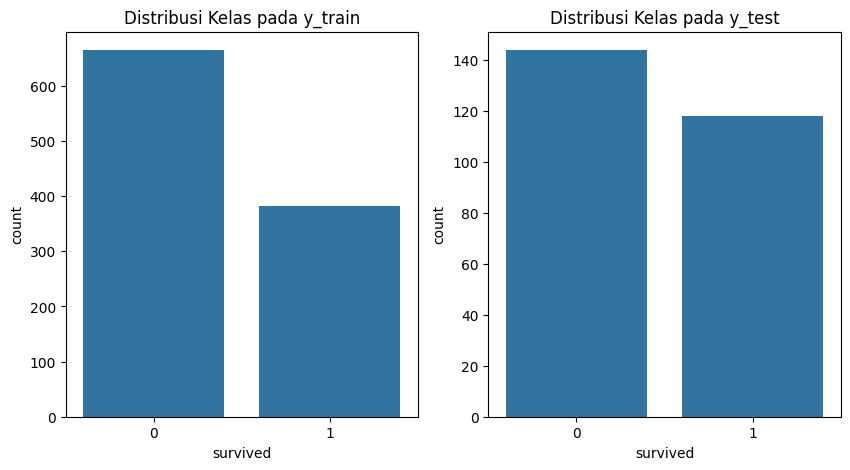

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi distribusi kelas pada y_train dan y_test
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Distribusi Kelas pada y_train')

plt.subplot(1, 2, 2)
sns.countplot(x=y_test)
plt.title('Distribusi Kelas pada y_test')

plt.show()


In [ ]:
dataset.to_excel('setelah_modeling.xlsx', index=False)


In [ ]:
# Menggunakan pandas untuk one-hot encoding
dataset = pd.get_dummies(dataset, columns=['sex', 'embarked'], drop_first=True)

# Sekarang data sudah dalam bentuk numerik, bisa digunakan untuk melatih model


In [ ]:
print(dataset.isnull().sum())


pclass           0
survived         0
name             0
age            263
sibsp            0
parch            0
ticket           0
fare             1
cabin         1014
boat           823
body          1188
home.dest      564
sex_male         0
embarked_Q       0
embarked_S       0
dtype: int64


In [ ]:
print(dataset.columns)


Index(['pclass', 'survived', 'name', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'boat', 'body', 'home.dest', 'sex_male', 'embarked_Q',
       'embarked_S'],
      dtype='object')


In [ ]:
# Cek kolom yang ada setelah encoding
print(dataset.columns)

# Pastikan menggunakan kolom yang benar setelah encoding
X = dataset[['pclass', 'sex_male', 'age', 'sibsp', 'parch', 'fare', 'embarked_Q']]
y = dataset['survived']


Index(['pclass', 'survived', 'name', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'boat', 'body', 'home.dest', 'sex_male', 'embarked_Q',
       'embarked_S'],
      dtype='object')


In [ ]:
print("Unique values in 'sex':", dataset['sex'].unique())
print("Unique values in 'embarked':", dataset['embarked'].unique())


Unique values in 'sex': ['female' 'male']
Unique values in 'embarked': ['S' 'C' nan 'Q']


In [ ]:
dataset['sex'] = dataset['sex'].map({'male': 0, 'female': 1})
dataset['embarked'] = dataset['embarked'].map({'C': 0, 'Q': 1, 'S': 2})



In [ ]:
print(dataset.head())


   pclass  survived                                             name  sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  NaN   
1       1         1                   Allison, Master. Hudson Trevor  NaN   
2       1         0                     Allison, Miss. Helen Loraine  NaN   
3       1         0             Allison, Mr. Hudson Joshua Creighton  NaN   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  NaN   

       age  sibsp  parch  ticket      fare    cabin  embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5       2.0    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26       2.0   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26       2.0  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26       2.0  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26       2.0  NaN    NaN   

                         home.dest  
0                     St Louis, MO  


In [ ]:
print("Unique values in 'sex':", dataset['sex'].unique())
print("Unique values in 'embarked':", dataset['embarked'].unique())


Unique values in 'sex': [nan]
Unique values in 'embarked': [ 2.  0. nan  1.]


In [ ]:
dataset['sex'] = dataset['sex'].map({'male': 0, 'female': 1})


In [ ]:
print("Unique values in 'sex':", dataset['sex'].unique())
print("Unique values in 'embarked':", dataset['embarked'].unique())


Unique values in 'sex': [nan]
Unique values in 'embarked': [ 2.  0. nan  1.]


In [ ]:
# Ganti NaN pada kolom 'embarked' dengan 'S'
dataset['embarked'] = dataset['embarked'].fillna('S')

In [ ]:
# Memisahkan fitur (X) dan target (y)
X = dataset[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
y = dataset['survived']


In [ ]:
print("Unique values in 'sex':", dataset['sex'].unique())
print("Unique values in 'embarked':", dataset['embarked'].unique())

Unique values in 'sex': [0]
Unique values in 'embarked': [2.0 0.0 'S' 1.0]


In [ ]:
print(X.head())  # Periksa data setelah encoding


   pclass  sex      age  sibsp  parch      fare embarked
0       1    0  29.0000      0      0  211.3375      2.0
1       1    0   0.9167      1      2  151.5500      2.0
2       1    0   2.0000      1      2  151.5500      2.0
3       1    0  30.0000      1      2  151.5500      2.0
4       1    0  25.0000      1      2  151.5500      2.0


In [ ]:
dataset['age'] = dataset['age'].fillna(dataset['age'].median())


In [ ]:
print(dataset.dtypes)


pclass         int64
survived       int64
name          object
sex            int64
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object


In [ ]:
print(dataset['embarked'].unique())


[2 0 3 1]


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Ganti NaN pada kolom 'embarked' dengan 'S'
dataset['embarked'] = dataset['embarked'].fillna('S')

# Pastikan kolom 'embarked' bertipe string
dataset['embarked'] = dataset['embarked'].astype(str)

# Menginisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Melakukan encoding untuk kolom 'sex' dan 'embarked'
dataset['sex'] = label_encoder.fit_transform(dataset['sex'])
dataset['embarked'] = label_encoder.fit_transform(dataset['embarked'])

# Memeriksa data setelah encoding
print(dataset[['sex', 'embarked']].head())


   sex  embarked
0    0         2
1    0         2
2    0         2
3    0         2
4    0         2


In [ ]:
from sklearn.model_selection import train_test_split

# Memisahkan data menjadi training dan testing set
X = dataset[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
y = dataset['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Membuat dan melatih model Logistic Regression
model = LogisticRegression(max_iter=1000)  # Menambah jumlah iterasi agar model konvergen
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
accuracy = model.score(X_test, y_test)
print(f"Akurasi model: {accuracy * 100:.2f}%")


Akurasi model: 69.47%


In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.66      0.92      0.77       144
           1       0.81      0.42      0.56       118

    accuracy                           0.69       262
   macro avg       0.73      0.67      0.66       262
weighted avg       0.73      0.69      0.67       262



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Membuat model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model dengan data training
rf_model.fit(X_train, y_train)

# Melakukan prediksi menggunakan data testing
y_pred_rf = rf_model.predict(X_test)

# Evaluasi model
print(f"Akurasi Random Forest: {accuracy_score(y_test, y_pred_rf) * 100:.2f}%")
print(classification_report(y_test, y_pred_rf))


Akurasi Random Forest: 71.37%
              precision    recall  f1-score   support

           0       0.70      0.84      0.76       144
           1       0.74      0.56      0.64       118

    accuracy                           0.71       262
   macro avg       0.72      0.70      0.70       262
weighted avg       0.72      0.71      0.71       262



In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

# Membuat model XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Melatih model dengan data training
xgb_model.fit(X_train, y_train)

# Melakukan prediksi menggunakan data testing
y_pred_xgb = xgb_model.predict(X_test)

# Evaluasi model
print(f"Akurasi XGBoost: {accuracy_score(y_test, y_pred_xgb) * 100:.2f}%")
print(classification_report(y_test, y_pred_xgb))


Akurasi XGBoost: 66.79%
              precision    recall  f1-score   support

           0       0.65      0.84      0.74       144
           1       0.70      0.46      0.55       118

    accuracy                           0.67       262
   macro avg       0.68      0.65      0.64       262
weighted avg       0.68      0.67      0.65       262



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:11:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset[['age', 'fare']] = scaler.fit_transform(dataset[['age', 'fare']])


In [ ]:
dataset.to_excel('new_dataset3.xlsx', index=False)


In [ ]:
# Cek rata-rata dan standar deviasi untuk memastikan standar normalisasi
print(f"Rata-rata age: {dataset['age'].mean()}")
print(f"Deviasi standar age: {dataset['age'].std()}")

print(f"Rata-rata fare: {dataset['fare'].mean()}")
print(f"Deviasi standar fare: {dataset['fare'].std()}")


Rata-rata age: -1.3027521511262342e-16
Deviasi standar age: 1.0003821899623622
Rata-rata fare: 4.34250717042078e-17
Deviasi standar fare: 1.0003821899623582


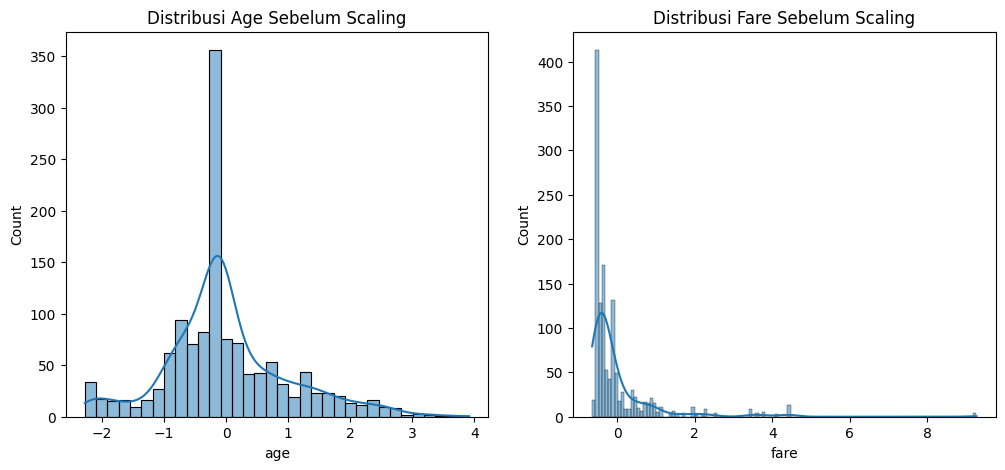

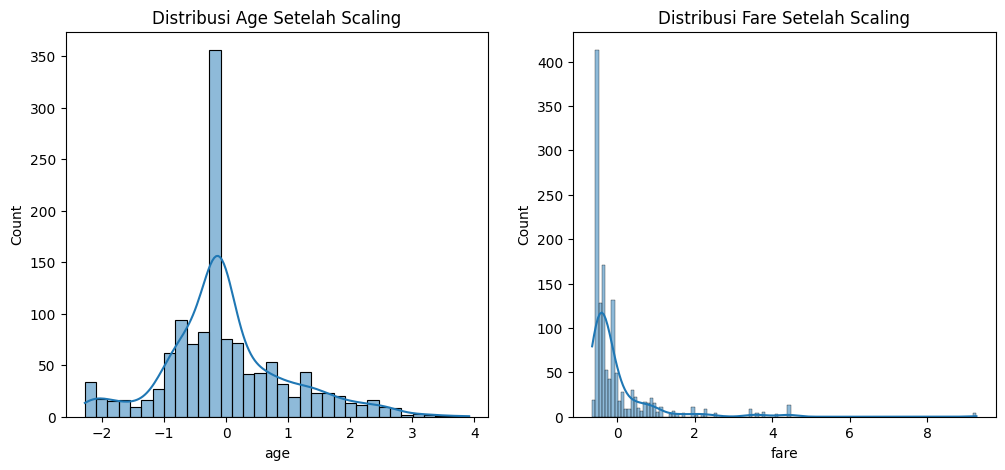

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sebelum scaling
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(dataset['age'], kde=True, ax=axes[0]).set_title('Distribusi Age Sebelum Scaling')
sns.histplot(dataset['fare'], kde=True, ax=axes[1]).set_title('Distribusi Fare Sebelum Scaling')

# Setelah scaling
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(dataset['age'], kde=True, ax=axes[0]).set_title('Distribusi Age Setelah Scaling')
sns.histplot(dataset['fare'], kde=True, ax=axes[1]).set_title('Distribusi Fare Setelah Scaling')

plt.show()


In [ ]:
print(dataset.isnull().sum())


pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
body         0
home.dest    0
dtype: int64
